<a href="https://colab.research.google.com/github/taliafabs/sta410-a1/blob/main/sta410_a1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA410 Assignment 1
Due: January 28, 2025 \
Student: Talia Fabregas \
Student number: 1008350213 \
While I did not directly collaborate with anyone else on this assignment, I attended office hours on Monday January 26, where students openly discussed assignment solutions and approaches. I referenced STA410 lecture slides throughout this assignment and any additional internet resources used are listed under the respective question.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## 1. Monte Carlo
Resources used:
* https://numpy.org/doc/2.1/reference/random/generated/numpy.random.standard_normal.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html




#### (a) N-step random walk for fixed number of steps, N=100

Code to simulate N-step random walk

In [2]:
def standard_random_walk(N=100, p=0.5):
  """
  """
  x_0 = 0 # start at the origin
  sum = x_0 # keep track of and return the sum
  S_n = [0] # S_n at each step n = 0, 1, 2, ..., N
  for j in range(N):
    u = np.random.uniform(0.0, 1.0)
    if u <= p:
      x_j = 1
    else:
      x_j = -1
    sum += x_j
    S_n.append(sum)
  return S_n, sum

Visualization of realizations of $S_n=\Sigma_{j=1}^n X_j$ as a function of $n$ for $n=1,...,N$

In [3]:
# perform a random walk with n=100 steps and get S_n
S_n = standard_random_walk()[0]

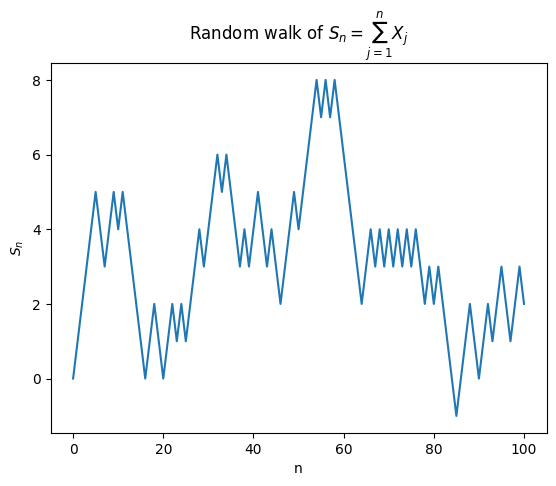

In [4]:
# plot it
plt.title("Random walk of $S_n = \\sum_{j=1}^{n} X_j$")
plt.xlabel("n")
plt.ylabel("$S_n$")
plt.plot(S_n)

#### (b) Simple Monte Carlo method with $10^5$ trials to compute $\mathbb{P}(S_N>10)$ and approximate 95% confidence interval for desired probability

We want to compute $\mathbb{P}(S_N>10) = \mathbb{P}(\Sigma_{j=1}^N X_j >10)$ where $X_1, ... X_N$ are iid Bernoulli random variables and $\mathbb{P}(X_j=1) = \mathbb{P}(X_j=-1)=0.5$ for each $j$ \
$$
\mathbb{P}(S_N>10) \approx \mathbb{E}[\mathbb{1}(S_{100} > 10)] = \frac{1}{10^5} \sum_{i=1}^{10^5} \mathbb{1}(S^{(i)}_{100} > 10)
$$

In [7]:
num_trials = 10**5
S_N_samples = []
S_N_indicators = []

# estimate the probability
for i in range(num_trials):
  S_N = standard_random_walk()[1]
  S_N_samples.append(S_N)
  S_N_indicators.append(int(S_N>10))
I_N = np.mean(S_N_indicators)

# estimate the variance
sum_sq_diff = 0
for i in range(num_trials):
  sum_sq_diff += (S_N_samples[i] - I_N)**2
sigma_squared_n = sum_sq_diff/num_trials

# standard error of estimator
standard_error = np.sqrt(sigma_squared_n/num_trials)

# approximate 95% confidence interval for true value of P(S_N > 10)
# z-score for a 95% confidence level (two-tailed)
z_score = stats.norm.ppf(0.975)
lower_bound = I_N - z_score*standard_error
upper_bound = I_N + z_score*standard_error

print(f"The simple Monte Carlo estimate for P(S_100 > 10) is {I_N}")
print(f"The 95% confidence interval for P(S_100>10) is [{lower_bound}, {upper_bound}]")

The simple Monte Carlo estimate for P(S_100 > 10) is 0.13691
The 95% confidence interval for P(S_100>10) is [0.07488835062330776, 0.19893164937669225]


#### (c) Derivations

As shown in part (b), the Monte Carlo estimate for $\mathbb{P}(S_N>10)$ is within the approximate 95\% confidence interval

Deriving the analytical expression for $\mathbb{P}(S_N>10)$ with fixed number of steps N=100: \
Let Y = the number of $x_j$'s that were -1 \
$$
S_{100} = \sum_{j=1}^{100} x_j = 100 - 2Y
$$
\
We know that each random walk step is an independent Bernoulli trial where $\mathbb{P}(x_j=1) = \mathbb{P}(x_j=-1) = 0.5$, so we have $Y \sim \text{Binomial}(100, 0.5)$. \
$S_{100}>10$ holds true when $100 - 2Y > 10$, aka when $Y < 45$. Since Y must be a natural number, $S_{100}>10$ when $Y \leq 44$. \
\
The expression for the desired probability is the Binomial cdf, $F(44) = \mathbb{P}(Y \leq 44)$: \
\begin{align*}
\mathbb{P}(S_{100}>10) &= \mathbb{P}(Y \leq 44) \\
&= \sum_{y=0}^{44} \mathbb{P}(Y=y) \\
&= \sum_{y=0}^{44} {100 \choose y} 0.5^{y}(1-0.5)^{100-y} \\
& = \sum_{y=0}^{44} {100 \choose y} 0.5^{100} \\
&= 0.5^{100} \sum_{y=0}^{44} {100 \choose y}
\end{align*}

\
Since the expression above is quite difficult to compute manually, `stats.binom.cdf` can be used to compute the desired probability.

In [8]:
stats.binom.cdf(44, 100, 0.5)

np.float64(0.1356265120369177)

In [9]:
lower_bound <= stats.binom.cdf(44, 100, 0.5) <= upper_bound

np.True_

#### (d) Code to simulate N-step random walk in 3-dimensions

In [10]:
def gaussian_random_walk_3d(N=100, d=3):
  """
  Simulate a 3d Gaussian random walk with N steps.
  Each component of the random vector X_j = (x1, x2, x3) is a standard normal random variable.
  """
  # store the random vector X_j from all N steps in an (N x d) matrix
  # d is the dimension of each X_j
  X = np.zeros((N+1, d))
  # start at the origin and store that vector
  X_0 = np.zeros(d)
  X[0] = X_0
  # simulate the Gaussian random walk with N steps
  for j in range(N):
    x_j = np.random.standard_normal(size=d)
    X[j] = x_j # store vector x_j in the jth row of X
  return X


#### (e) Simple Monte Carlo method with $10^5$ trials to compute $\mathbb{P}(||S_N|| > L)$ for $L=10, 50$

Still a using N=100 step 3d Gaussian Random walk in each trial

In [11]:
def mc_prob_greater_than_L(num_trials=10**5, L=10):
  """
  Simple Monte Carlo method to estimate the probability that ||S_N|| > L
  """
  num_greater_than_L = 0
  for i in range(num_trials): # for each of the 10^5 trials
    X = gaussian_random_walk_3d() # perform a 100-step Gaussian random walk
    S_N = np.sum(X, axis=0) # compute the sum vector
    magnitude_s_n = np.linalg.norm(S_N) # compute the magnitude of the sum vector
    if magnitude_s_n > L:
      num_greater_than_L += 1 # keep track of how many sum vectors have a magnitude > L
  return num_greater_than_L/num_trials


In [12]:
prob_greater_than_10 = mc_prob_greater_than_L()
prob_greater_than_50 = mc_prob_greater_than_L(L=50)
prob_greater_than_10, prob_greater_than_50
print(f"P(||S_N|| > 10) = {prob_greater_than_10}")
print(f"P(||S_N|| > 50) = {prob_greater_than_50}")

P(||S_N|| > 10) = 0.80046
P(||S_N|| > 50) = 2e-05


<div style="page-break-after: always;"></div>


## 2. Another CDF-based Sampling Method
#### (a) Show that the map satisfies $T(X) \sim p$ if $X \sim q$
$T(x) = F_p^{-1} \circ F_q(x) = F_p^{-1} [F_q(x)]$ \
\
Step 1: show that $F_q(x) \sim \text{Unif}[0, 1]$
Let random variable $U = F_q(X)$, where random variable $X \sim q$. Then,
<!-- Given continuous random variable $X \sim q$, define random variable $U = F(X)$ \
Using the general inverse definition of $F_q: \mathbb{R} \rightarrow [0, 1]$ and $F_q^{-1}: [0, 1] \rightarrow \mathbb{R}$, $$F^{-1}_q(u) = \text{min}\{x: F(x) \geq u\},$$ there exists a unique $x$ such that $F_q(x) = u$.  -->
\begin{align*}
F(u) &= \mathbb{P}[U \leq u] \\
&= \mathbb{P}[F_q(x) \leq u] \\
&= \mathbb{P}[F_q^{-1}(F_q(x)) \leq F_q^{-1}(u)] \\
&= \mathbb{P}[X \leq F^{-1}_q(u)] = F_q[F_q^{-1}(u)] \\
&= u
\end{align*}

$F(u)=u$ is the CDF of a uniform (0, 1) random variable. \
Therefore $u = F_q(x) \sim \text{Uniform}[0,1]$ \
\
Step 2: Show that $T(X) = F^{-1}_p(U) \sim p$, where $U=F_q(X)$ is a uniform random variable. \
\begin{align*}
\mathbb{P}[T(X) \leq x] &= \mathbb{P}[F_{-1}^p(U) \leq x] \\
&= \mathbb{P}[F_p(F^{-1}_p(U)) \leq F_p(x)] \\
&= \mathbb{P}[U \leq F_p(x)] \\
&= F_p(x)
\end{align*}
<!-- Step 2: Show that $T(X) = F_p^{-1}[U] \sim p$, using $u = F_q(x) \sim \text{Uniform}[0, 1]$, which was shown in step 1.
$$
\mathbb{P}[F_p^{-1} \circ F_q(x) \leq x] = \mathbb{P}[F_p^{-1}(u) \leq x] = \mathbb{P}[F_p(F_p^{-1}(u)) \leq F_p(x)] = \mathbb{P}[U \leq F_p(x)] = F_p(x)
$$ -->

Resources used for this question:
- https://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf
- https://matthewfeickert.github.io/Statistics-Notes/notebooks/Introductory/probability-integral-transform.html
- https://en.wikipedia.org/wiki/Inverse_transform_sampling
- https://en.wikipedia.org/wiki/Probability_integral_transform


## 3. Rejection Sampling

Target density:
$$
p(x) = \frac{exp -x^2/2}{\sqrt{2 \pi} (1 - \Phi(b)}, \space \space \space x \geq b
$$
with $p(x)=0$ for $x<b$, where $\Phi(b)$ is the standard normal CDF, \
\
Proposal density (shifted exponential):
$$
q(x) = b \cdot exp(-b(x-b)), \space \space \space x \geq b
$$

#### (b)
The optimal constant $M>0$ to maximize the acceptance ratio, \frac{p(x)}{Mq(x)} is $M = \frac{p(x_{max})}{q(x_{max})}$, where $x_{max} = \arg\max_{x} \frac{p(x)}{q(x)}$ \
\
Find the value of $x$ that maximizes \frac{p(x)}{q(x)} and use the log for an easier derivation.
\begin{align*}
log \bigg( \frac{p(x)}{q(x)} \bigg) &= log \space p(x) - log \space q(x) \\
&= log \bigg( \frac{exp(-x^2/2)}{\sqrt{2\pi}(1 - \Phi(b))} \bigg) - log \big(b \cdot exp(-b(x-b)), \space \space \space x \geq b \big) \\
&= log
\end{align*}
\
Derive $log \space p(x) - log \space q(x)$ wrt $x$, set to 0, and solve:

#### (a)
In part (b), which I completed first, I showed that ...

## 4. Importance Sampling

#### (a) Explicit formula for the importance sampling approximation of
$$
I = \int \mathbb{1}(||u|| \geq L) p(u) du
$$
in the case where target distribution $p$ is the distribution for $S_N$ in problem 1 \
\
Re-write $I$ with respect to biasing distribution $q$:

\begin{align*}
I &= \int \mathbb{1}(||u|| \geq L) p(u) du \\
&= \int \mathbb{1}(||u|| \geq L) \frac{p(u)}{q(u)} q(u) du \\
&= \mathbb{E}_{u \sim q}\big[\mathbb{1}(||u|| \geq L) \frac{p(u)}{q(u)}  \big]
\end{align*}

Importance sampling estimator $I_{T}^{IS}$, where $T$ is the number of trials (aka samples):
\begin{align*}
I \approx I_{T}^{IS} &:= \frac{1}{T}\sum_{i=1}^T \mathbb{1}(||u^{(i)}|| \geq L) \frac{p(u^{(i)})}{q(u^{(i)})} \\
&= \frac{1}{T}\sum_{i=1}^T \mathbb{1}(||u^{(i)}|| \geq L) w(u^{(i)})
\end{align*}
Where $w(u) = \frac{p(u)}{q(u)}$ are the importance weights




#### (b) Importance sampling with $10^5$ trials to compute $\mathbb{P}(S_N > 55)$ and discussion about how to construct a good biasing distribution in this case

In [35]:
# Choosing a good biasing distribution

# target distribution p
p = stats.multivariate_normal(mean=np.zeros(3), cov=100*np.eye(3))

# proposal distribution q
q = stats.multivariate_normal(mean=np.zeros(3), cov=500*np.eye(3))

In [34]:
def importance_sampling():
  """
  Importance sampling method to estimate the probability that ||S_N|| > 55 for
  a Gaussian random walk
  """
  num_trials = 10**5
  L=55
  d=3

  # define target distribution, p
  p = stats.multivariate_normal(mean=np.zeros(d), cov=100*np.eye(3))

  # define proposal distribution, q
  q = stats.multivariate_normal(mean=np.zeros(d), cov=500*np.eye(3))

  # draw num_trials independent samples of u from q
  u_samples = q.rvs(size=num_trials)

  # compute importance weights
  weights = p.pdf(u_samples)/q.pdf(u_samples)

  # compute the magnitudes
  u_magnitudes = np.linalg.norm(u_samples, axis=1)

  # compute f(u)
  indicators = (u_magnitudes>L).astype(float)

  # compute the importance sampling estimate
  is_estimate = np.mean(indicators*weights)

  return is_estimate

In [32]:
num_trials=10**5
L=55
d=3
target_std, proposal_std = 10, 35

u_samples = np.random.normal(0, target_std, size=(num_trials, d))

# define p and q
# p_pdf = stats.multivariate_normal(mean=np.zeros(d), cov=target_std**2)
# q_pdf = stats.multivariate_normal(mean=np.zeros(d), cov=proposal_std**2)
p_pdf = stats.multivariate_normal.pdf(u_samples, mean=np.zeros(d), cov=target_std**2)
q_pdf = stats.multivariate_normal.pdf(u_samples, mean=np.zeros(d), cov=proposal_std**2)
# compute importance weights
weights = p_pdf/q_pdf

# compute indicators
norms = np.linalg.norm(u_samples, axis=1)
indicators = (norms>L).astype(float)

prob = np.mean(indicators*weights)

print(f"IS estimate: {prob: .4e}")

IS estimate:  0.0000e+00


In [33]:
def f(u):
  return float(np.linalg.norm(u) > 55)

def is_prob_greater_than_L(num_trials=10**5, num_steps=100, L=55):
  """
  Importance sampling method to estimate the probability that ||S_N|| > L for
  a Gaussian random walk
  with N=100 steps
  """
  # target distribution
  p = stats.multivariate_normal(mean=np.zeros(3), cov=num_steps*np.eye(3))
  # proposal distribution (refer to lecture 2 slides for this!)
  # set mean of q = (L, 0, ....)
  q = stats.multivariate_normal(mean=np.zeros(3), cov=500*np.eye(3))
  # a biasing distribution with wide enough tails to capture 55 and -55
  # something to push samples into tail greater than 55
  # so it should be
  # just standard for now, find a better biasing distn later
  # suggestion: mean 0, biasing sd 35
  total = 0
  for i in range(num_trials):
    # sample u from the biasing distribution q
    u_i = q.rvs()
    # compute the importance weight
    w_i = p.pdf(u_i)/q.pdf(u_i)
    # perform the step
    total += f(u_i) * w_i
  return total

In [22]:
is_estimate = is_prob_greater_than_L()
print(f"Importance sampling estimate for P(||S_N||>55):{is_estimate}")

Importance sampling estimate for P(||S_N||>55):0.12389485894251429


In [17]:
# plot p and q
  # target distribution
p = stats.multivariate_normal(mean=np.zeros(3), cov=100*np.eye(3))
  # proposal distribution (refer to lecture 2 slides for this!)
  # set mean of q = (L, 0, ....)
q = stats.multivariate_normal(mean=np.zeros(3), cov=35*np.eye(3))

# plot
x = np.linspace(-5, 5, 100)


In [ ]:
# define target distribution p
p = stats.multivariate_normal(mean=np.zeros(3), cov=100*np.eye(3))

# define proposal distribution q with mean=(55, 0, 0) and identity variance
q = stats.multivariate_normal(mean=np.array([55, 0, 0]), cov=(25**2)*np.eye(3))

# define f(u) = I(|u| > 55)
def f(u):
  return float(np.linalg.norm(u) > 55)
# maybe define it as a function
f: callable = lambda u: int(np.linalg.norm(u) > 55)

# perform importance sampling with 10**5 trials
total = 0
for i in range(10**5):
  X = gaussian_random_walk_3d(N=100) # perform 100-step Gaussian random walk
  u_i = np.sum(X, axis=0) # compute the sum vector
  total += f(u_i) * (p.pdf(u_i)/q.pdf(u_i))
total/10**5


np.float64(0.0)

In [ ]:
# turn that into a function

# def importance_sample_prob_greater_than_L(num_trials=10**5, num_steps=100, L=55):
def imoprtance_sample_prob_greater_than_L(p=p, q=q, f=f, num_trials=10**5, L=55):
  """
  Importance sampling method to estimate the probability that ||S_N|| > L for
  a Gaussian random walk
  with N=100 steps

  Arguments:
    - p: proposal distribution
    - q: target distribution:
    - f: function f
    - num_trials: number of trials
    - L: threshold value
  """
  sum = 0
  for i in range(num_trials):
    X = gaussian_random_walk_3d(N=100)
    u_i = np.sum(X, axis=0)
    sum += f(u_i) * (p.pdf(u_i)/q.pdf(u_i))
  return sum/num_trials



In [ ]:
# define the target distribution (distribution of S_N)

# define f(u) = I(|u| > 55)
def f(u):
  return float(np.linalg.norm(u) > 55)

def is_prob_greater_than_L(num_trials=10**5, num_steps=100, L=55):
  """
  Importance sampling method to estimate the probability that ||S_N|| > L for
  a Gaussian random walk
  with N=100 steps
  """
  # target distribution
  p = stats.multivariate_normal(mean=np.zeros(3), cov=num_steps*np.eye(3))
  # proposal distribution (refer to lecture 2 slides for this!)
  # set mean of q = (L, 0, ....)
  q = stats.multivariate_normal(mean=np.zeros(3), cov=np.eye(3))
  # a biasing distribution with wide enough tails to capture 55 and -55
  # something to push samples into tail greater than 55
  # so it should be
  # just standard for now, find a better biasing distn later
  # suggestion: mean 0, biasing sd 35
  total = 0
  for i in range(num_trials):
    # sample u from the biasing distribution q
    u_i = q.rvs()
    # compute the importance weight
    w_i = p.pdf(u_i)/q.pdf(u_i)
    # perform the step
    total += f(u_i) * w_i


    # X = gaussian_random_walk_3d(N=num_steps)
    # S_N = np.sum(X, axis=0)

A rough idea of how this will need to be implemented

In [ ]:
# target
p = stats.multivariate_normal(mean=np.zeros(3), cov=100*np.eye(3))
# proposal (STILL NEED TO FIND A GOOD PROPOSAL THIS IS JUST TO IMPLEMENT FOR NOW)
q = stats.multivariate_normal(mean=np.zeros(3), cov=np.eye(3))

total=0
for i in range(10**5):
  X = gaussian_random_walk_3d(N=100)
  u = np.sum(X, axis=0)
  u_ = np.linalg.norm(S_N)
  total += int(u >= 55) * (p.pdf(u)/q.pdf(u))

is_estimate = total/10**5
is_estimate

## 5. MCMC Sampling